# Project#4 Predictive Analysis Using Scikit-Learn

### Submitted by : Shichao Zhou (szhou2@mail.yu.edu), Muhammad Bilal Jamil (mjamil@mail.yu.edu)

### Submitted to : Prof. Topor

### Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis:-

### Overview:
The data set we will be using is the UCI Mushroom Data Set from website https://archive.ics.uci.edu/ml/datasets/mushroom.
This data set provides hypothetical samples with 23 species of gilled mushrooms in the Agaricus and Lepiota Family. 
- Number of Instances: 8124
- Number of Attributes: 22 (all nominally valued)
- Data columns (total 23 columns)
- Missing Attribute Values: 2480 of them (denoted by "?")

### Objectives:
We want to analyze which other attributes (i.e., aside from the poisonous/edible indicator) are the best predictors of whether a particular mushroom is toxic or edible. To be precise, mushrooms can be distinguished well or the features that are highly determined to avoid danger and ensure safety in predicting whether a mushroom with particular attributes is edible or not.

### Data Dictionary:
The attributes information are described below.

- Class: edible=e, poisonous=p (dependant variable)
- Cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- Cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- Cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- Bruises?: bruises=t,no=f
- Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- Gill-attachment: attached=a,descending=d,free=f,notched=n
- Gill-spacing: close=c,crowded=w,distant=d
- Gill-size: broad=b,narrow=n
- Gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- Stalk-shape: enlarging=e,tapering=t
- Stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- Stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- Stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- Stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- Stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- Veil-type: partial=p,universal=u
- Veil-color: brown=n,orange=o,white=w,yellow=y
- Ring-number: none=n,one=o,two=t
- Ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- Spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- Population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- Habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the raw data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
# add column names
names=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
'veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [3]:
# read dataframe
df = pd.read_csv(url,header = None,names = names)

In [4]:
# check the first 5 rows data.
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

From the above code, we can see that there are 8124 entries and 23 columns following the dataset introduction. Though there is non-null data, we still need to pay attention to missing values as it is denoted as '?'.

### Data Preparation:

In [6]:
# get unique values for every columns
Uniquevalue = {column: df[column].unique() for column in df}
pd.Series(Uniquevalue)

class                                                     [p, e]
cap-shape                                     [x, b, s, f, k, c]
cap-surface                                         [s, y, f, g]
cap-color                         [n, y, w, g, e, p, b, u, c, r]
bruises                                                   [t, f]
odor                                 [p, a, l, n, f, c, y, s, m]
gill-attachment                                           [f, a]
gill-spacing                                              [c, w]
gill-size                                                 [n, b]
gill-color                  [k, n, g, p, w, h, u, e, b, r, y, o]
stalk-shape                                               [e, t]
stalk-root                                       [e, c, b, r, ?]
stalk-surface-above-ring                            [s, f, k, y]
stalk-surface-below-ring                            [s, f, y, k]
stalk-color-above-ring               [w, g, p, n, b, e, o, c, y]
stalk-color-below-ring   

From above we can see only column stalk-root has missing values, the total missing values will affect accuracy of prediction. Also,veil-type has only one category ,so we will remove the columns.

In [7]:
# remove stalk-root
del df['stalk-root']
del df['veil-type']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

Now, we have no missing values. All the features are categorical,so we need to convert them to numerical values for applying correlation and doing feature selection in next step for helping us to choose the other two columns.

In [8]:
# Convert the “e”/”p” indicators in the first column to digits: for example, the “e” might become 0 and “p” might 
# become 1. 
# Convert other categorical features to numerical values.
new_df = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
new_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### Feature selection and Heatmap:

<AxesSubplot:>

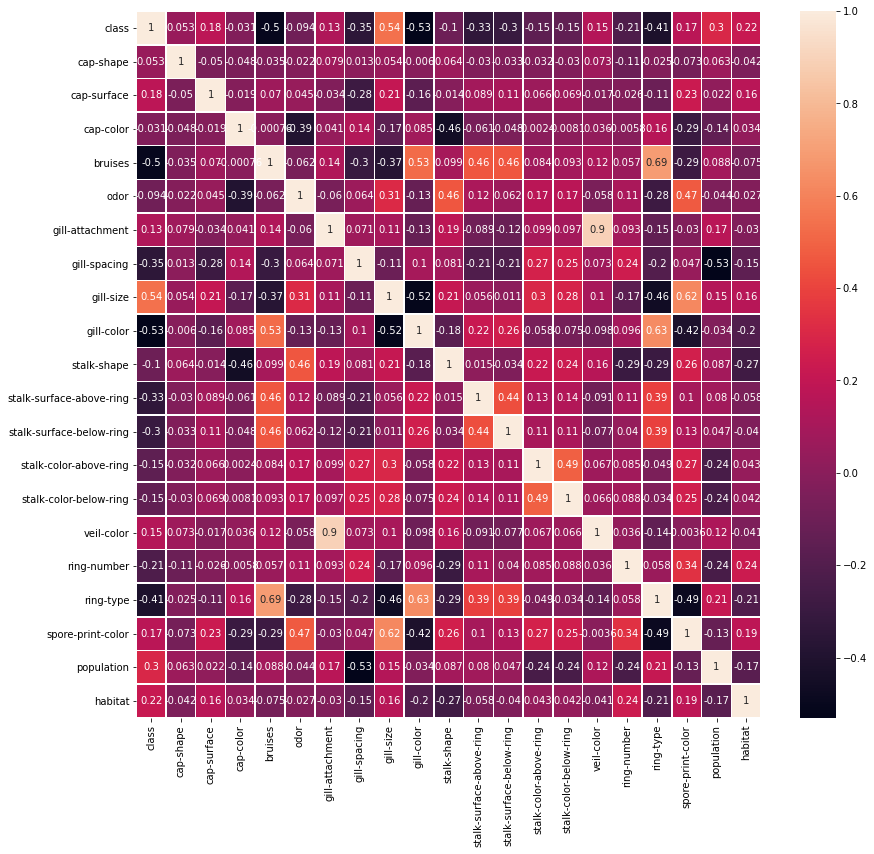

In [9]:
# use heatmap to see the correlation between the other columns and class column
corr = new_df.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr,linewidths = 0.5, annot = True)

From above heatmap, we can find gill-color,ring-type,bruises and gill-size have higher relationship with the class attribute,so we would select them.

In [10]:
# create subset dataframe
sub_df = df.iloc[:,[0,4,5,8,9,17]].copy()
sub_df

,class,bruises,odor,gill-size,gill-color,ring-type
0,p,t,p,n,k,p
1,e,t,a,b,k,p
2,e,t,l,b,n,p
3,p,t,p,n,n,p
4,e,f,n,b,k,e
...,...,...,...,...,...,...
8119,e,f,n,b,y,p
8120,e,f,n,b,y,p
8121,e,f,n,b,n,p
8122,p,f,y,n,b,e


Conversion will be made in the following way: "e" (edible) will be substitute by 0, and "p" (poisonous) will be converted to 1.

In [11]:
# convert edible and poisonous as 0 and 1:
sub_df['class'].replace('e',0, inplace = True)
sub_df['class'].replace('p',1, inplace = True)

### Creating Dummy Variables:

Dummy variables will be created for other columns with get_dummies() method for further use. The binary indicators 0 and 1 means false and true respectively.

In [12]:
# For each of the other columns in our DataFrame we create a set of dummy variables:
sub_df_2 = pd.get_dummies(sub_df, columns=['bruises', 'odor', 'gill-size', 'gill-color','ring-type'])
sub_df_2.head()

,class,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,...,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Exploratory Data Analysis on selected attributes:

In [13]:
# We will now again check if our dataframe had any nulls or not for confirmation:
sub_df.isnull().sum()

class         0
bruises       0
odor          0
gill-size     0
gill-color    0
ring-type     0
dtype: int64

As per our result, we see that there are no null values in the selected columns. Therefore, the above created dummied dataframe  i.e. 'sub_df_2' will be the same as the original sub_df dataframe, which is easier to manipulate later.

In [14]:
#We would like to see some general statistics of our subset dataframe:
mush_list =['class','bruises', 'odor', 'gill-size', 'gill-color','ring-type']
for i in range(6):
    j=sub_df[mush_list[i]].describe()
    print(j)
    print('-----------')

count    8124.000000
mean        0.482029
std         0.499708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64
-----------
count     8124
unique       2
top          f
freq      4748
Name: bruises, dtype: object
-----------
count     8124
unique       9
top          n
freq      3528
Name: odor, dtype: object
-----------
count     8124
unique       2
top          b
freq      5612
Name: gill-size, dtype: object
-----------
count     8124
unique      12
top          b
freq      1728
Name: gill-color, dtype: object
-----------
count     8124
unique       5
top          p
freq      3968
Name: ring-type, dtype: object
-----------


In [15]:
# convert sub_df dataframe from categorical to numerical
new_sub_df = pd.DataFrame({col: sub_df[col].astype('category').cat.codes for col in sub_df}, index=sub_df.index)
new_sub_df.head()

,class,bruises,odor,gill-size,gill-color,ring-type
0,1,1,6,1,4,4
1,0,1,0,0,4,4
2,0,1,3,0,5,4
3,1,1,6,1,5,4
4,0,0,5,0,4,0


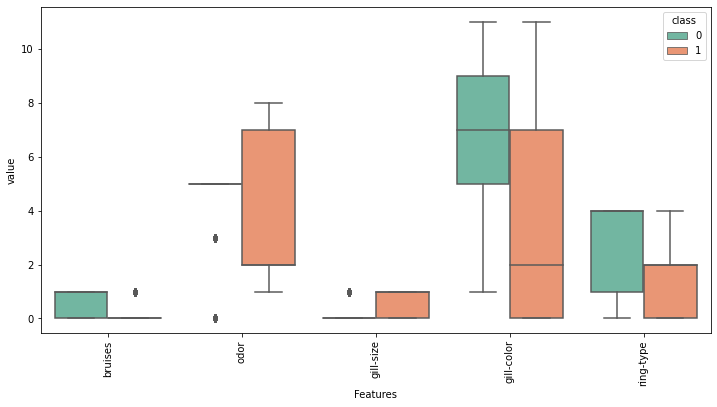

In [16]:
# show the distribution of data for each of the columns we selected
sub_df_div = pd.melt(new_sub_df, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(12,6))
p = sns.boxplot(ax = ax, x="Features", y="value", hue="class", data=sub_df_div,palette = 'Set2')
sub_df_no_class = new_sub_df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(sub_df_no_class));

According to the box plots shown above:
    We can see that the data of each column is not evenly distributed.

1 : class


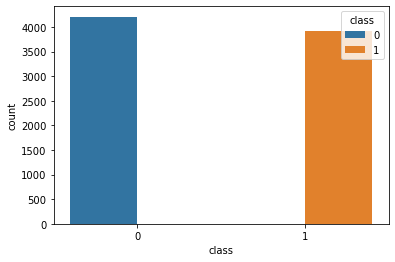

2 : bruises


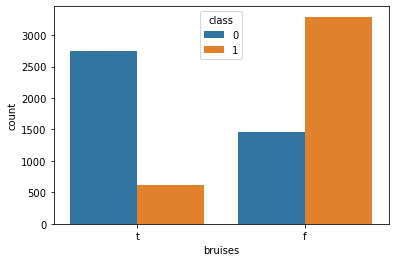

3 : odor


<Figure size 432x288 with 0 Axes>

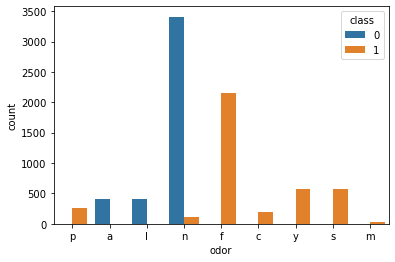

4 : gill-size


<Figure size 432x288 with 0 Axes>

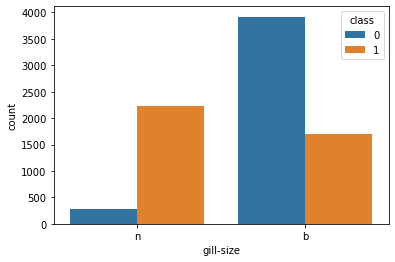

5 : gill-color


<Figure size 432x288 with 0 Axes>

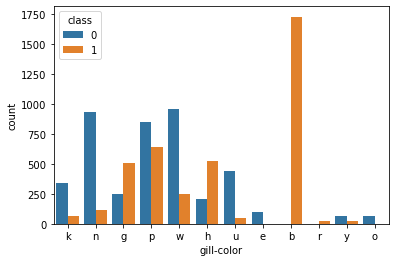

6 : ring-type


<Figure size 432x288 with 0 Axes>

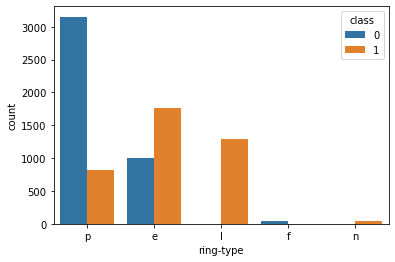

<Figure size 432x288 with 0 Axes>

In [17]:
# show plots for edible/poisonous vs. odor as well as the other columns that we selected
selected_attributes = sub_df
i = 0
for col in selected_attributes:
    print(i+1,":",col)
    plt.figure(i)
    sns.countplot(x=col, hue="class", data=sub_df);
    plt.show();
    plt.clf();
    i = i + 1

According to the bar plots shown above:

* Edible mushrooms (with value 0) frequency is a little bit more than the poisonous mushrooms (with value 1).
* For the 'Bruises', we see that 't' has more edible mushrooms i.e. around 2800 where as the poisonous ones are around a little more than 500. For 'f' there are around 1500 edible mushrooms but it has more poisonous mushrooms which are more than 3000.
* For 'Odor', the edible mushrooms have no odor and are around 3500. Whereas, poisonous mushrooms have the most 'foul (f)' odor that is around more than 2000. The odor which has very less distribution is the one with 'musty (m)' odor.
* For 'Gill-Size', we see that there are more edible mushrooms that have less 'narrow (n)' gill-size that is around 250 and more 'broad (b)' gill-size i.e. around 3800. Whereas, the poisonous mushrooms have more 'narrow (n)' distribution around 2200 than 'broad (b) around 1800.
* For 'Gill-Color', we see that poisonous mushrooms have more 'buff (b)' color i.e. around 1750, whereas the most edible mushrooms have 'brown (n)' quantity i.e. between 750 and 1000. Whereas, the least amount of poisonous mushrooms are 'green (r)' and for edible ones they have 'yellow (y' and 'orange (o)' color which is between 0 to 250.
* For 'Ring-type', most edible mushrooms have the 'pendant (p)' shaped ring-type. Whereas, most poisonous mushrooms have the 'evanescent (e)' ring-type.

### Phase II: Predictive Modeling:

Now in this part, we will use our dummy dataframe which we created earlier for logestic regression:

In [18]:
# We will import train_test_split for spliting the data into training and testing:
from sklearn.model_selection import train_test_split

# We wil import LogisticRegression as well:
from sklearn.linear_model import LogisticRegression

Now, in order for us to determine which of the predictor columns which we selected earlier most accurately predicts whether a mushroom is poisonous or not, the data will be split based on the predictor to training and testing sets.

In [19]:
# X for explanatory variables, Y for response variable:

X_bruises = sub_df_2.iloc[:,1:3] 

X_odor = sub_df_2.iloc[:,3:12] 

X_gillsize = sub_df_2.iloc[:,12:14]

X_gillcolor = sub_df_2.iloc[:,14:26]

X_ringtype = sub_df_2.iloc[:,26:]

Y = sub_df_2.iloc[:,0]

# Now, we will split the data as 'training data' and 'testing data' for each:

X_bruises_train, X_bruises_test, Y_train, Y_test = train_test_split(X_bruises, Y, random_state=0)

X_odor_train, X_odor_test, Y_train, Y_test = train_test_split(X_odor, Y, random_state=0)

X_gillsize_train, X_gillsize_test, Y_train, Y_test = train_test_split(X_gillsize, Y, random_state=0)

X_gillcolor_train, X_gillcolor_test, Y_train, Y_test = train_test_split(X_gillcolor, Y, random_state=0)

X_ringtype_train, X_ringtype_test, Y_train, Y_test = train_test_split(X_ringtype, Y, random_state=0)

Now, we will check the poisonous percentage of the training mushrooms by calculating how many records are there in the training data set and then in the testing data set. The accuracy needs to exceed the null error rate. So let's check:

In [20]:
# The percentage of poisonous mushrooms in the training set, take any training set from the above listed
# training sets, since the row numbers are the same for everyone:

p_percent = Y_train.values.sum()/X_bruises_train.shape[0]

# count the null error rate:
1-p_percent

0.516494337764648

Now, we will apply the logistic regression on each of our training sets which we created earlier:

In [21]:
# using LogisticRegression() for model_bruises:
model_bruises = LogisticRegression()

# fit the logistic regression to the bruises training set:
model_bruises= model_bruises.fit(X_bruises_train, Y_train)

# using LogisticRegression() for model_odor:
model_odor = LogisticRegression()

# fit the logistic regression to the odor training set:
model_odor = model_odor.fit(X_odor_train, Y_train)

# using LogisticRegression() for gill_size:
model_gillsize = LogisticRegression()

# fit the logistic regression to the gill_size training set:
model_gillsize = model_gillsize.fit(X_gillsize_train, Y_train)

# using LogisticRegression() for gill_color:
model_gillcolor = LogisticRegression()

# fit the logistic regression to the gill_color training set:
model_gillcolor = model_gillcolor.fit(X_gillcolor_train, Y_train)

# using LogisticRegression() for ring_type:
model_ringtype = LogisticRegression()

# fit the logistic regression to the ring_type training set:
model_ringtype = model_ringtype.fit(X_ringtype_train, Y_train)

In [22]:
# Now, let's calculate the accuracy of each model relative to the training data set:

[model_bruises.score(X_bruises_train, Y_train),model_odor.score(X_odor_train, Y_train),
 model_gillsize.score(X_gillsize_train, Y_train), model_gillcolor.score(X_gillcolor_train, Y_train),
model_ringtype.score(X_ringtype_train, Y_train)]

[0.7424913835548991,
 0.9847365829640571,
 0.7584112916461513,
 0.8063351386837354,
 0.769735762350238]

Now, if we start comparing to the null error rates above, all the four models accuracy are higher than 0.516, which means that the models are all useful. Among the five calculated models, following are the accuracies:

1. Odor model has the highest accuracy i.e. 0.985.
2. Then its Gill-Color model which has 0.81.
3. Then followed by the Ring-Type model i.e. 0.769.
4. Model of Gill-Size had the 2nd least amount of accuracy i.e. 0.75.
6. The lowest accuracy, 0.742 is of the Bruises Model.

In [23]:
# Now, we will calculate the accuracy of each model relative to the test data set:
[model_bruises.score(X_bruises_test, Y_test),model_odor.score(X_odor_test, Y_test),
 model_gillsize.score(X_gillsize_test, Y_test), model_gillcolor.score(X_gillcolor_test, Y_test),
model_ringtype.score(X_ringtype_test, Y_test)]

[0.7483998030526834,
 0.9867060561299852,
 0.7498769079271295,
 0.8010832102412605,
 0.792712949286066]

Here, we see that the accuracy of almost every model is the same, while the accuracy for the ring-type model increased from 0.769 to 0.792.

In [24]:
# Similarly, we will check the coefficent of each model we created earlier:

[model_bruises.coef_,model_odor.coef_,model_gillsize.coef_,model_gillcolor.coef_,model_ringtype.coef_]

[array([[ 1.13705997, -1.13704532]]),
 array([[-5.67623859,  2.31258867,  4.15170232, -5.74837734,  1.25215044,
         -5.07297676,  2.55357693,  3.10477045,  3.12242404]]),
 array([[-1.45139095,  1.4511678 ]]),
 array([[ 5.85481405, -2.7847637 ,  1.23347919,  1.36001928, -1.13143933,
         -1.52570092, -2.41901744,  0.16098176,  2.43370523, -1.72616148,
         -0.96433163, -0.49989408]]),
 array([[-0.47581479, -3.30229401,  4.38289188,  1.71857403, -2.3264475 ]])]

Based upon these values, it is easy to draw some following responses:
* Bruises: Where there are 'bruises (t)', then those mushrooms are likely to be edible. Whereas, if there are 'no bruises (f)' then they are less likely to be poisonous.
* Odor: Mushrooms which have 'almond (a), l (anise) and n (no odor)' are likely to be edible and 'reosote=c,fishy=y,foul=f, musty=m, pungent=p, and spicy=s are likely to be poisonous'.
* Gillsize: Mushrooms with 'narrow (n)' gill size are more likely to be poisonous than the ones which have 'broad(b)' gill size.
* Gillcolor: Mushrooms with 'buff (b), gray (g) and chocolate (h) are more likely to be poisonous, where as the rest are prone to be edible.
* Ring-Type: Mushtooms with 'evanescent (e), large (l) and none (n) are more likely to be poisonous where as the rest are more prone to be edible

### Conclusion and  Recommendations 

* Among all the five predictor columns, odor was the most accurate to predict if the mushroom is poisonous or not.
* The accuracy of bruises has the worst performance to predict if a mushroom is poisonous or not. So it can be either replaced with another attribute from the dataset or be considered last as a predictive candidate.
* Gill color also proved to be correct in predicting if a mushroom is poisonous or not.
* We directly delete the stalk-root column, which may affect the accuracy of our predicted results. Because there are a total of 2480 missing data, accounting for 30% of the total data. We should consider how to fill up the missing data up and down.
* When we performed feature selection, we only used one method to select attributes. It will also affect the reliability of our results. The attributes that we have chosen not will likely have a significant correlation with the column class.We should use 2-3 more ways to consider and choose the most relevant column comprehensively. For example, in the link we attached to the references, an article mentions the method of the Chi-Squared test and mutual information.
* For more accurate results and analysis, we can run similar models for each of our original data frame columns. Such models would help us isolate the highest performing data and then remove those which are not up to the mark. This way, we could then create a new and improved model with only the highest performing data. A dataset trained with that has a chance of yielding a higher accuracy than having those models, which can be a lousy predictor.


### References:

* https://machinelearningmastery.com/an-introduction-to-feature-selection/
* http://deeplearning.net/tutorial/mlp.html
* https://www.xenonstack.com/insights/machine-learning-model-testing/#:~:text=One%20of%20the%20aspects%20of%20building%20a%20Machine,using%20incorrect%20data%20called%20as%20Data%20Poisoning%20Attack.
* https://thecleverprogrammer.com/2020/07/09/training-and-test-sets/
* https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb
* https://elitedatascience.com/model-training
* https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
* https://dataaspirant.com/feature-selection-methods-machine-learning/